In [1]:
#Disable Warnings for deprecation and other issues
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
test = pd.read_pickle("test_data.pkl")
train = pd.read_pickle("train_data.pkl")


In [4]:
test.head()

,alert_key,cust_id,risk_rank,occupation_code,total_asset,sar_flag,country,cur_type,amt,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,0.0,130.0,47.0,1110.0,2197.0,0.0,174655.0,-2156.0,0.0,0.0,0.0,-2178.0,0.0
14,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,0.0,130.0,47.0,144559.0,4447.0,0.0,206512.0,210149.0,144559.0,-144559.0,0.0,2548.0,144559.0
28,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Check for duplicates in alert_key in test data
test['alert_key'].duplicated().sum()

0

In [6]:
train.head()

,alert_key,cust_id,risk_rank,occupation_code,total_asset,sar_flag,country,cur_type,amt,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
15856,171142,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,0.0,130.0,47.0,1990.0,12565.0,0.0,150744.0,82748.0,0.0,0.0,12477.0,12477.0,0.0
15869,171152,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13.0,599497.0,0.0,130.0,47.0,1349.0,3581.0,0.0,324783.0,64363.0,0.0,0.0,0.0,4981.0,0.0
15883,171178,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9.0,3634343.0,0.0,130.0,47.0,51583.0,829364.0,0.0,7666339.0,2343836.0,0.0,0.0,781279.0,781279.0,0.0
15896,171180,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17.0,4076287.0,0.0,130.0,47.0,410.0,636.0,0.0,256134.0,3538.0,0.0,0.0,0.0,3410.0,0.0
15909,171181,d253f77ce816406296362e15aa64888080acc551e9c596...,3,17.0,1827055.0,0.0,130.0,47.0,0.0,0.0,0.0,308771.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
len(train)

15313

In [8]:
#Assign sar_flag to Y 
Y = train['sar_flag']
#Drop sar_flag from train
train.drop('sar_flag', axis=1, inplace=True)

#Drop sar_flag from test
test.drop('sar_flag', axis=1, inplace=True)

#Check the shape of train and test
print(train.shape)
print(test.shape)

#Add Alert Key to new dataframe
testAlert = pd.DataFrame(test['alert_key'])

#Drop alert_key and cust_id from test
test.drop(['alert_key','cust_id'], axis=1, inplace=True)

#Check the shape of test
print(test.shape)

#check shape of testAlert
print(testAlert.shape)

(15313, 17)
(1845, 17)
(1845, 15)
(1845, 1)


In [9]:
#Assign the columns to X
X = train
#Drop alert_key and cust_id from X
X.drop(['alert_key','cust_id'], axis=1, inplace=True)

#Check the shape of X
print(X.shape)

(15313, 15)


In [10]:
Y.head()

15856    0.0
15869    0.0
15883    0.0
15896    0.0
15909    0.0
Name: sar_flag, dtype: float64

In [11]:
Y.value_counts()

0.0    15189
1.0      124
Name: sar_flag, dtype: int64

In [12]:
#Import SMOTE
from imblearn.over_sampling import SMOTE


In [13]:
#Oversample the data
sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X, Y)

#Turn the oversampled data into a dataframe
Y_res = pd.DataFrame(Y_res)




In [14]:
#Y_res head
Y_res.head()

,sar_flag
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [15]:
#Check the value counts of the oversampled data
Y_res.value_counts()

sar_flag
0.0         15189
1.0         15189
dtype: int64

In [16]:
#Import Train Test Split
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size = 0.2, random_state = 42)


In [17]:
#Import Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
#Import Roc Curve  
from sklearn.metrics import roc_curve, auc
#import XGBClassifier, RandomForestClassifier, KnearsNeighborsClassifier, logisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



In [18]:

#Function for plotting ROC_AUC curve
def plot_roc_curve(Y_test, preds):
    fpr, tpr, thresholds = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      3041
         1.0       0.95      0.98      0.96      3035

    accuracy                           0.96      6076
   macro avg       0.96      0.96      0.96      6076
weighted avg       0.96      0.96      0.96      6076

Confusion matrix:
 [[2869  172]
 [  51 2984]]


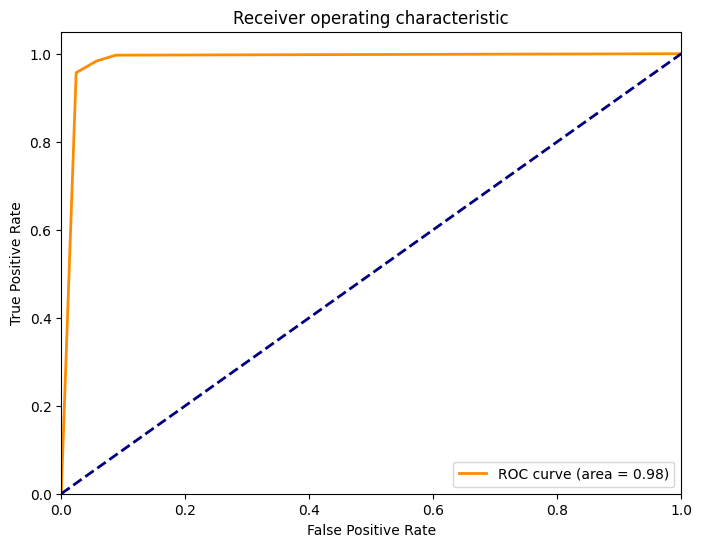

In [19]:
# Create K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, knn_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, knn_pred))
plot_roc_curve(Y_test, knn.predict_proba(X_test)[::,1])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3041
         1.0       0.99      0.99      0.99      3035

    accuracy                           0.99      6076
   macro avg       0.99      0.99      0.99      6076
weighted avg       0.99      0.99      0.99      6076

Confusion matrix:
 [[3021   20]
 [  16 3019]]


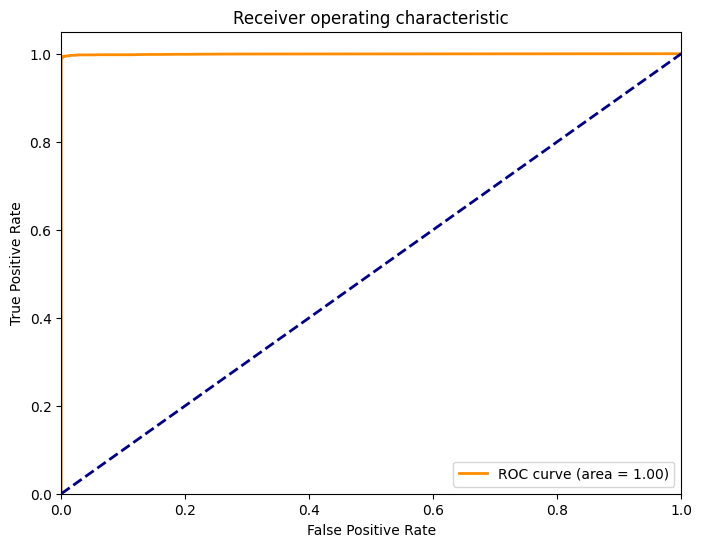

In [20]:
#Create Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced',verbose=1)
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, rfc_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, rfc_pred))
plot_roc_curve(Y_test, rfc.predict_proba(X_test)[::,1])

Classification report for classifier :               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3041
         1.0       1.00      1.00      1.00      3035

    accuracy                           1.00      6076
   macro avg       1.00      1.00      1.00      6076
weighted avg       1.00      1.00      1.00      6076

Confusion matrix:
 [[3032    9]
 [  15 3020]]


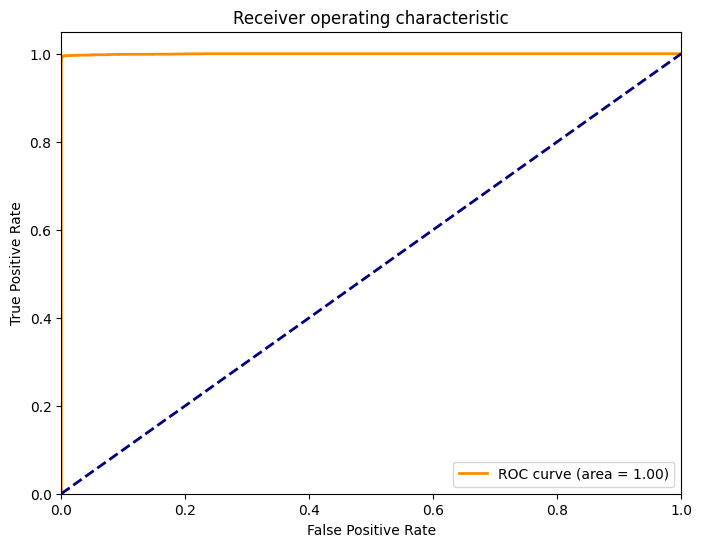

In [21]:
#Create XGBoost Classifier
xgb = XGBClassifier(n_estimators=100, random_state=42, verbosity=1, objective='binary:logistic',eval_metric='rmse')

xgb.fit(X_train, Y_train)
xgb_pred = xgb.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, xgb_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, xgb_pred))
plot_roc_curve(Y_test, xgb.predict_proba(X_test)[::,1])


In [22]:
#Check the accuracy of the model
print("Accuracy of the model is: ", accuracy_score(Y_test, xgb_pred))

Accuracy of the model is:  0.9960500329163924


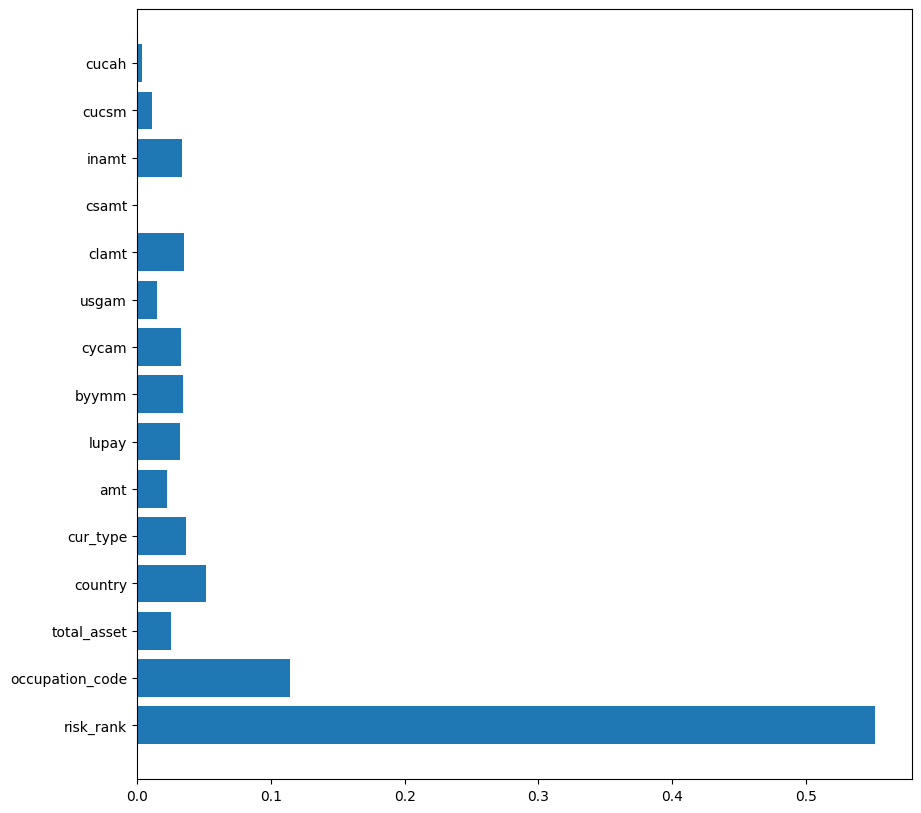

In [23]:
#Plot feature importance
plt.figure(figsize=(10, 10))
plt.barh(X.columns, xgb.feature_importances_)
plt.show()


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.51      0.92      0.65      3041
         1.0       0.57      0.11      0.18      3035

    accuracy                           0.51      6076
   macro avg       0.54      0.51      0.42      6076
weighted avg       0.54      0.51      0.42      6076

Confusion matrix:
 [[2801  240]
 [2714  321]]


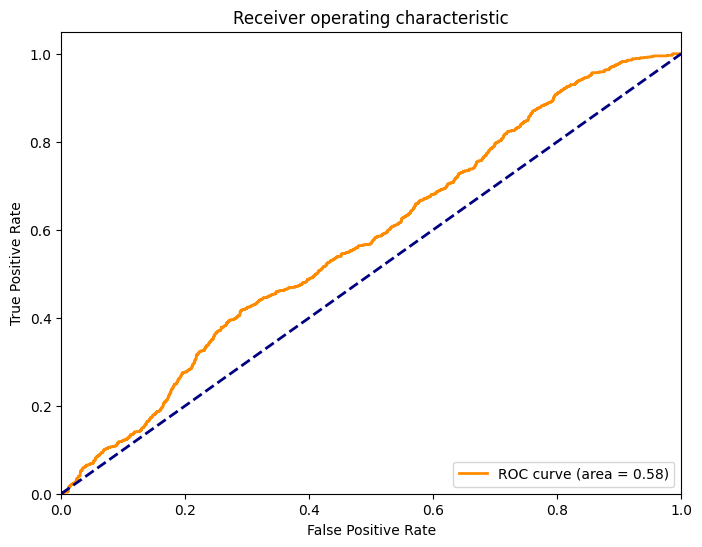

In [24]:
#Create Logistic Regression Classifier for fraud detection
lr = LogisticRegression(random_state=42, class_weight='balanced', verbose=1)
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, lr_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, lr_pred))
plot_roc_curve(Y_test, lr.predict_proba(X_test)[::,1])

In [25]:
test.head()

,risk_rank,occupation_code,total_asset,country,cur_type,amt,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
0,1,19.0,1465816.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2.0,98177.0,130.0,47.0,1110.0,2197.0,0.0,174655.0,-2156.0,0.0,0.0,0.0,-2178.0,0.0
14,1,19.0,2052922.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,3,15.0,201906.0,130.0,47.0,144559.0,4447.0,0.0,206512.0,210149.0,144559.0,-144559.0,0.0,2548.0,144559.0
28,1,12.0,7450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
len(test)


1845

In [27]:
#Use classifier to test the test data
xgb_pred_test = xgb.predict(test)
knn_pred_test = knn.predict(test)
rfc_pred_test = rfc.predict(test)
lr_pred_test = lr.predict(test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [28]:
#Create a dataframe with the results
results = pd.DataFrame({'XGB':xgb_pred_test, 'KNN':knn_pred_test, 'RFC':rfc_pred_test, 'LR':lr_pred_test})
results.head()



,XGB,KNN,RFC,LR
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0


In [29]:
results['XGB'].value_counts()

0.0    1841
1.0       4
Name: XGB, dtype: int64

In [30]:
results['KNN'].value_counts()

0.0    1555
1.0     290
Name: KNN, dtype: int64

In [31]:
results['RFC'].value_counts()

0.0    1822
1.0      23
Name: RFC, dtype: int64

In [32]:
results['LR'].value_counts()

0.0    1124
1.0     721
Name: LR, dtype: int64

In [33]:
#Predict probablity of fraud using models
xgb_pred_test_prob = xgb.predict_proba(test)
knn_pred_test_prob = knn.predict_proba(test)
rfc_pred_test_prob = rfc.predict_proba(test)
lr_pred_test_prob = lr.predict_proba(test)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [34]:
#print the probablity of fraud
print(xgb_pred_test_prob)
print(knn_pred_test_prob)
print(rfc_pred_test_prob)
print(lr_pred_test_prob)

[[9.9819988e-01 1.8001187e-03]
 [9.8892581e-01 1.1074191e-02]
 [9.9882537e-01 1.1746198e-03]
 ...
 [9.9975282e-01 2.4718244e-04]
 [9.9059087e-01 9.4091175e-03]
 [9.9615496e-01 3.8450472e-03]]
[[1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 ...
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.         1.        ]]
[[0.92 0.08]
 [0.96 0.04]
 [0.92 0.08]
 ...
 [0.96 0.04]
 [0.68 0.32]
 [0.97 0.03]]
[[0.48591074 0.51408926]
 [0.51936804 0.48063196]
 [0.48027261 0.51972739]
 ...
 [0.50142218 0.49857782]
 [0.50502543 0.49497457]
 [0.49920063 0.50079937]]


In [35]:
#Create dataframe with probablity of fraud from xgb
xgb_pred_test_prob = pd.DataFrame(xgb_pred_test_prob)
xgb_pred_test_prob.head()

,0,1
0,0.998200,0.001800
1,0.988926,0.011074
2,0.998825,0.001175
3,0.999740,0.000260
4,0.997015,0.002985


In [36]:
#Create dataframe with probablity of fraud from knn
knn_pred_test_prob = pd.DataFrame(knn_pred_test_prob)
knn_pred_test_prob.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [37]:
#Create dataframe with probablity of fraud from rfc
rfc_pred_test_prob = pd.DataFrame(rfc_pred_test_prob)
rfc_pred_test_prob.head()

,0,1
0,0.92,0.08
1,0.96,0.04
2,0.92,0.08
3,1.00,0.00
4,0.91,0.09


In [38]:
#Create dataframe with probablity of fraud from lr
lr_pred_test_prob = pd.DataFrame(lr_pred_test_prob)
lr_pred_test_prob.head()

,0,1
0,0.485911,0.514089
1,0.519368,0.480632
2,0.480273,0.519727
3,0.929863,0.070137
4,0.499928,0.500072


In [39]:
bTrain = pd.read_pickle("train_data.pkl")
bTest = pd.read_pickle("test_data.pkl")

In [40]:
bTrain.head()

,alert_key,cust_id,risk_rank,occupation_code,total_asset,sar_flag,country,cur_type,amt,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
15856,171142,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,0.0,130.0,47.0,1990.0,12565.0,0.0,150744.0,82748.0,0.0,0.0,12477.0,12477.0,0.0
15869,171152,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13.0,599497.0,0.0,130.0,47.0,1349.0,3581.0,0.0,324783.0,64363.0,0.0,0.0,0.0,4981.0,0.0
15883,171178,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9.0,3634343.0,0.0,130.0,47.0,51583.0,829364.0,0.0,7666339.0,2343836.0,0.0,0.0,781279.0,781279.0,0.0
15896,171180,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17.0,4076287.0,0.0,130.0,47.0,410.0,636.0,0.0,256134.0,3538.0,0.0,0.0,0.0,3410.0,0.0
15909,171181,d253f77ce816406296362e15aa64888080acc551e9c596...,3,17.0,1827055.0,0.0,130.0,47.0,0.0,0.0,0.0,308771.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
bTest.head()

,alert_key,cust_id,risk_rank,occupation_code,total_asset,sar_flag,country,cur_type,amt,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,0.0,130.0,47.0,1110.0,2197.0,0.0,174655.0,-2156.0,0.0,0.0,0.0,-2178.0,0.0
14,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,0.0,130.0,47.0,144559.0,4447.0,0.0,206512.0,210149.0,144559.0,-144559.0,0.0,2548.0,144559.0
28,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
len(bTrain)


15313

In [43]:
len(bTest)

1845

In [44]:
len(testAlert)

1845

In [45]:
len(xgb_pred_test_prob)

1845

In [46]:
#Conver xgb_pred_test_prob to csv
xgb_pred_test_prob.to_csv('xgb_pred_test_prob.csv', index=False)

In [47]:
#Reset index of testAlert
testAlert.reset_index(drop=True, inplace=True)


In [48]:
#Add probablity of fraud to the testalert dataframe
testAlert['probability'] = xgb_pred_test_prob[1]
testAlert.head()






,alert_key,probability
0,352249,0.001800
1,352253,0.011074
2,352254,0.001175
3,352280,0.000260
4,352282,0.002985


In [49]:
len(testAlert)


1845

In [50]:
my_submission = testAlert

In [51]:
#find 357307 in the testAlert dataframe
testAlert.loc[testAlert['alert_key'] == 357307]


,alert_key,probability
720,357307,0.003506


In [52]:
#Import sample.cs to dataframe
sample = pd.read_csv("sample.csv")
sample.head()

,alert_key,probability
0,357307,0.000017
1,376329,0.000324
2,373644,0.000372
3,357668,0.000489
4,354443,0.000526


In [60]:
len(sample)

3850

In [58]:
#Combine my_submission and sample and replace the probability column with my_submission probability column
my_submission_combine = pd.merge(sample, testAlert, on='alert_key', how='left')
my_submission_combine.head()


,alert_key,probability_x,probability_y
0,357307,0.000017,0.003506
1,376329,0.000324,NaN
2,373644,0.000372,NaN
3,357668,0.000489,0.001035
4,354443,0.000526,0.002524


In [59]:
len(my_submission_combine)

3850

In [62]:
#find row with 352249.0
my_submission_combine.loc[my_submission_combine['alert_key'] == 352249.0]


,alert_key,probability_x,probability_y
372,352249,0.098923,0.0018


In [63]:
#Replace the null values with the sample probability but keep the non null values
my_submission_combine['probability'] = my_submission_combine['probability_y'].fillna(my_submission_combine['probability_x'])
my_submission_combine.head()





,alert_key,probability_x,probability_y,probability
0,357307,0.000017,0.003506,0.003506
1,376329,0.000324,NaN,0.000324
2,373644,0.000372,NaN,0.000372
3,357668,0.000489,0.001035,0.001035
4,354443,0.000526,0.002524,0.002524


In [64]:
len(my_submission_combine)

3850

In [65]:
#Drop the probability_x and probability_y columns
my_submission_combine.drop(['probability_x', 'probability_y'], axis=1, inplace=True)
my_submission_combine.head()

,alert_key,probability
0,357307,0.003506
1,376329,0.000324
2,373644,0.000372
3,357668,0.001035
4,354443,0.002524


In [66]:
#My submission combine dataframe head
my_submission_combine.head()

,alert_key,probability
0,357307,0.003506
1,376329,0.000324
2,373644,0.000372
3,357668,0.001035
4,354443,0.002524


In [67]:
#convert the dataframe to csv
my_submission_combine.to_csv('submissionUpdatedDataSet.csv', index=False)


In [68]:
#Implement kfolds cross validation to check the accuracy of the model
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgb, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))



Accuracy: 99.48 %
Standard Deviation: 0.14 %


In [69]:
#Create Voting Classifier
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('xgb', xgb), ('knn', knn), ('rfc', rfc)], voting='soft')
voting_clf.fit(X_train, Y_train)

#Check the accuracy of the model
for clf in (xgb, knn, rfc, voting_clf):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, y_pred))



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.8s finished


XGBClassifier 0.9960500329163924
KNeighborsClassifier 0.9632982225148123


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier 0.9940750493745886


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


VotingClassifier 0.9960500329163924


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [70]:
#Voting Classifier Classification report
print("Classification report for classifier :", classification_report(Y_test, y_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, y_pred))


Classification report for classifier :               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3041
         1.0       1.00      1.00      1.00      3035

    accuracy                           1.00      6076
   macro avg       1.00      1.00      1.00      6076
weighted avg       1.00      1.00      1.00      6076

Confusion matrix:
 [[3028   13]
 [  11 3024]]


In [71]:
#Voting Classifier probaility prediction
voting_clf_pred_test_prob = voting_clf.predict_proba(test)
voting_clf_pred_test_prob = pd.DataFrame(voting_clf_pred_test_prob)
voting_clf_pred_test_prob.head()


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


,0,1
0,0.972733,0.027267
1,0.982975,0.017025
2,0.972942,0.027058
3,0.999913,0.000087
4,0.969005,0.030995


In [1]:
#result of voting_clf classifier
voting_clf_pred_test = voting_clf.predict(test)
voting_clf_pred_test = pd.DataFrame(voting_clf_pred_test)
voting_clf_pred_test.head()



NameError: name 'voting_clf' is not defined

In [74]:
#Length of voting_clf_pred_test_prob
len(voting_clf_pred_test_prob)



1845

In [75]:
##Create a dataframe with sample alert_key column and voting_clf_pred_test_prob 1 column
voting_clf_pred_test_prob = pd.DataFrame(voting_clf_pred_test_prob[1])
voting_clf_pred_test_prob.head()

,1
0,0.027267
1,0.017025
2,0.027058
3,0.000087
4,0.030995


In [63]:
#Combine my_submission_voting_clf and sample and replace the probability column with my_submission_voting_clf probability column
my_submission_voting_clf_combine = pd.merge(sample, my_submission_voting_clf, on='alert_key', how='left')
my_submission_voting_clf_combine.head()

,alert_key,probability_x,probability_y
0,357307,0.000017,NaN
1,376329,0.000324,NaN
2,373644,0.000372,NaN
3,357668,0.000489,NaN
4,354443,0.000526,NaN


In [64]:
#Drop probability_x column
my_submission_voting_clf_combine = my_submission_voting_clf_combine.drop(['probability_x'], axis=1)

#rename probability_y column to probability
my_submission_voting_clf_combine = my_submission_voting_clf_combine.rename(columns={'probability_y': 'probability'})

In [65]:
#Replace NaN values with 0
my_submission_voting_clf_combine['probability'] = my_submission_voting_clf_combine['probability'].fillna(0)

#show the head of my_submission_voting_clf_combine
my_submission_voting_clf_combine.head()

,alert_key,probability
0,357307,0.0
1,376329,0.0
2,373644,0.0
3,357668,0.0
4,354443,0.0


In [66]:
#convert the dataframe to csv
my_submission_voting_clf_combine.to_csv('submission_voting_clf.csv', index=False)


In [76]:
#Import Optuna
import optuna


In [77]:
#Create a function to optimize the hyperparameters of xgb
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.4, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
    }
    xgb = XGBClassifier(**param)
    xgb.fit(X_train, Y_train)
    y_pred = xgb.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    return accuracy



    

In [78]:
#Create a study object and optimize the hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

#Print the best parameters
print(study.best_params)

#Print the best value
print(study.best_value)


[I 2022-12-11 14:39:43,530] A new study created in memory with name: no-name-a875dafc-0e09-43b8-9c8b-9d29e93e6e5d


[14:39:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:39:57,893] Trial 0 finished with value: 0.9952271231073074 and parameters: {'n_estimators': 861, 'max_depth': 8, 'learning_rate': 0.010260941624005981, 'subsample': 0.6171352476704491, 'colsample_bytree': 0.7019207410042947, 'gamma': 0.00013798212570248654, 'reg_alpha': 0.027470627277058728, 'reg_lambda': 0.0004397573939632421}. Best is trial 0 with value: 0.9952271231073074.


[14:39:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:40:02,748] Trial 1 finished with value: 0.9935813034891375 and parameters: {'n_estimators': 453, 'max_depth': 4, 'learning_rate': 0.07691268717389695, 'subsample': 0.8099335408614637, 'colsample_bytree': 0.6168974926874682, 'gamma': 0.06896571255787858, 'reg_alpha': 0.14333501871967658, 'reg_lambda': 1.0873622416345737e-06}. Best is trial 0 with value: 0.9952271231073074.


[14:40:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:40:09,119] Trial 2 finished with value: 0.9958854509545754 and parameters: {'n_estimators': 443, 'max_depth': 6, 'learning_rate': 0.06935425412242478, 'subsample': 0.6651507440233592, 'colsample_bytree': 0.8101681890648902, 'gamma': 2.836793756270314e-05, 'reg_alpha': 1.730933843945648e-07, 'reg_lambda': 8.253867462409519e-08}. Best is trial 2 with value: 0.9958854509545754.


[14:40:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:40:18,706] Trial 3 finished with value: 0.9963791968400263 and parameters: {'n_estimators': 622, 'max_depth': 7, 'learning_rate': 0.05762204793382136, 'subsample': 0.6558796728197682, 'colsample_bytree': 0.6756102300018948, 'gamma': 1.1999646008635345e-08, 'reg_alpha': 1.1835921467007776e-07, 'reg_lambda': 1.4394463702240578e-06}. Best is trial 3 with value: 0.9963791968400263.


[14:40:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:40:28,228] Trial 4 finished with value: 0.9953917050691244 and parameters: {'n_estimators': 851, 'max_depth': 5, 'learning_rate': 0.21740267571470637, 'subsample': 0.6602176732129774, 'colsample_bytree': 0.45742509323620867, 'gamma': 0.0001163704225745958, 'reg_alpha': 3.472889257844319e-06, 'reg_lambda': 7.745849917529909e-06}. Best is trial 3 with value: 0.9963791968400263.


[14:40:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:40:36,640] Trial 5 finished with value: 0.9934167215273206 and parameters: {'n_estimators': 957, 'max_depth': 3, 'learning_rate': 0.07509375246704977, 'subsample': 0.9071212782072399, 'colsample_bytree': 0.45412080399459626, 'gamma': 0.013728611743931295, 'reg_alpha': 1.4384818655238356e-07, 'reg_lambda': 2.638265820755727e-05}. Best is trial 3 with value: 0.9963791968400263.


[14:40:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:40:41,798] Trial 6 finished with value: 0.9972021066491112 and parameters: {'n_estimators': 406, 'max_depth': 10, 'learning_rate': 0.357510380379541, 'subsample': 0.42852495408413505, 'colsample_bytree': 0.895405930671261, 'gamma': 1.6468674163487085e-07, 'reg_alpha': 0.6036120059910416, 'reg_lambda': 8.636208472659497e-05}. Best is trial 6 with value: 0.9972021066491112.


[14:40:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:40:43,633] Trial 7 finished with value: 0.8648782093482554 and parameters: {'n_estimators': 206, 'max_depth': 3, 'learning_rate': 0.016627343357108637, 'subsample': 0.6766460617557677, 'colsample_bytree': 0.5999389166691986, 'gamma': 0.0602976564589531, 'reg_alpha': 0.0006584360758923069, 'reg_lambda': 0.011387624329065246}. Best is trial 6 with value: 0.9972021066491112.


[14:40:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:40:45,624] Trial 8 finished with value: 0.9117840684660962 and parameters: {'n_estimators': 225, 'max_depth': 3, 'learning_rate': 0.028821244873754714, 'subsample': 0.7353223116247329, 'colsample_bytree': 0.9402055998082725, 'gamma': 0.2754409902910634, 'reg_alpha': 0.31545162949592404, 'reg_lambda': 0.0012646206184503443}. Best is trial 6 with value: 0.9972021066491112.


[14:40:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:40:56,827] Trial 9 finished with value: 0.9963791968400263 and parameters: {'n_estimators': 535, 'max_depth': 9, 'learning_rate': 0.023265227793527198, 'subsample': 0.9155369200884311, 'colsample_bytree': 0.8500644798953014, 'gamma': 3.0643696973991324e-07, 'reg_alpha': 0.007065542991193627, 'reg_lambda': 3.6428085119355836e-06}. Best is trial 6 with value: 0.9972021066491112.


[14:40:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:41:01,063] Trial 10 finished with value: 0.9944042132982225 and parameters: {'n_estimators': 329, 'max_depth': 10, 'learning_rate': 0.453194595218038, 'subsample': 0.40539613516769973, 'colsample_bytree': 0.9694730808087613, 'gamma': 1.323971659430179e-06, 'reg_alpha': 2.6219563152972135e-05, 'reg_lambda': 0.3035076599189403}. Best is trial 6 with value: 0.9972021066491112.


[14:41:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:41:09,629] Trial 11 finished with value: 0.9960500329163924 and parameters: {'n_estimators': 677, 'max_depth': 7, 'learning_rate': 0.17015533474892297, 'subsample': 0.5088983940705698, 'colsample_bytree': 0.7277958053191459, 'gamma': 1.371068030373587e-08, 'reg_alpha': 3.598126049655867e-08, 'reg_lambda': 5.654511180715964e-08}. Best is trial 6 with value: 0.9972021066491112.


[14:41:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:41:21,503] Trial 12 finished with value: 0.9963791968400263 and parameters: {'n_estimators': 656, 'max_depth': 10, 'learning_rate': 0.043749078617581955, 'subsample': 0.518032598303413, 'colsample_bytree': 0.5259639911258218, 'gamma': 1.2888662844900904e-08, 'reg_alpha': 0.0001873509995557972, 'reg_lambda': 9.659079332368198e-05}. Best is trial 6 with value: 0.9972021066491112.


[14:41:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:41:31,531] Trial 13 finished with value: 0.9965437788018433 and parameters: {'n_estimators': 667, 'max_depth': 8, 'learning_rate': 0.15673758568936208, 'subsample': 0.5425273573317632, 'colsample_bytree': 0.7389412451703526, 'gamma': 4.0637215213936495e-07, 'reg_alpha': 2.6455990228809365e-06, 'reg_lambda': 5.623581297995626e-07}. Best is trial 6 with value: 0.9972021066491112.


[14:41:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:41:33,297] Trial 14 finished with value: 0.9960500329163924 and parameters: {'n_estimators': 115, 'max_depth': 9, 'learning_rate': 0.4117806976402147, 'subsample': 0.4139294204149063, 'colsample_bytree': 0.8246042061140545, 'gamma': 7.434209334915432e-07, 'reg_alpha': 6.1692958953637e-06, 'reg_lambda': 2.791991072142807e-07}. Best is trial 6 with value: 0.9972021066491112.


[14:41:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:41:43,146] Trial 15 finished with value: 0.9958854509545754 and parameters: {'n_estimators': 765, 'max_depth': 8, 'learning_rate': 0.17049754065111788, 'subsample': 0.4818330232644869, 'colsample_bytree': 0.7694547663513546, 'gamma': 5.659389668233318e-06, 'reg_alpha': 0.0013616896893366363, 'reg_lambda': 0.006021571902565901}. Best is trial 6 with value: 0.9972021066491112.


[14:41:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:41:49,087] Trial 16 finished with value: 0.9968729427254773 and parameters: {'n_estimators': 370, 'max_depth': 9, 'learning_rate': 0.26895410053398655, 'subsample': 0.5613069615993659, 'colsample_bytree': 0.8935771023298891, 'gamma': 1.50242452363481e-07, 'reg_alpha': 2.2525603584924317e-06, 'reg_lambda': 2.786229031216463e-08}. Best is trial 6 with value: 0.9972021066491112.


[14:41:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:41:54,198] Trial 17 finished with value: 0.9963791968400263 and parameters: {'n_estimators': 357, 'max_depth': 10, 'learning_rate': 0.2803863562039083, 'subsample': 0.4422148468467931, 'colsample_bytree': 0.8962090559040745, 'gamma': 0.0011805213614795697, 'reg_alpha': 3.80110784906031e-05, 'reg_lambda': 0.5550003758447102}. Best is trial 6 with value: 0.9972021066491112.


[14:41:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:42:00,056] Trial 18 finished with value: 0.9968729427254773 and parameters: {'n_estimators': 336, 'max_depth': 9, 'learning_rate': 0.28713123744940316, 'subsample': 0.5877439067960193, 'colsample_bytree': 0.9931240906721915, 'gamma': 1.0959371757206157e-07, 'reg_alpha': 0.022027382359043526, 'reg_lambda': 1.1585671267893064e-08}. Best is trial 6 with value: 0.9972021066491112.


[14:42:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:42:04,947] Trial 19 finished with value: 0.9962146148782094 and parameters: {'n_estimators': 274, 'max_depth': 9, 'learning_rate': 0.11004036770264732, 'subsample': 0.44296594796700045, 'colsample_bytree': 0.9796964001471208, 'gamma': 8.274457607428883e-06, 'reg_alpha': 0.6283452921225028, 'reg_lambda': 1.1647902273951493e-08}. Best is trial 6 with value: 0.9972021066491112.


[14:42:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:42:10,204] Trial 20 finished with value: 0.9952271231073074 and parameters: {'n_estimators': 467, 'max_depth': 6, 'learning_rate': 0.4969143223119881, 'subsample': 0.4772940331173739, 'colsample_bytree': 0.5532356038784164, 'gamma': 7.970409083086675e-08, 'reg_alpha': 7.221453229802599e-07, 'reg_lambda': 1.8166306121179487e-05}. Best is trial 6 with value: 0.9972021066491112.


[14:42:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:42:16,120] Trial 21 finished with value: 0.9960500329163924 and parameters: {'n_estimators': 396, 'max_depth': 9, 'learning_rate': 0.29883573137838837, 'subsample': 0.5719246157966424, 'colsample_bytree': 0.8870061622081505, 'gamma': 8.673869405921047e-08, 'reg_alpha': 0.027731983421026785, 'reg_lambda': 2.533609561281645e-08}. Best is trial 6 with value: 0.9972021066491112.


[14:42:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:42:21,257] Trial 22 finished with value: 0.9965437788018433 and parameters: {'n_estimators': 295, 'max_depth': 10, 'learning_rate': 0.29341312775789896, 'subsample': 0.5860626629936284, 'colsample_bytree': 0.9860524117978691, 'gamma': 1.192500350906084e-07, 'reg_alpha': 0.07425389375001872, 'reg_lambda': 1.4249180135963976e-07}. Best is trial 6 with value: 0.9972021066491112.


[14:42:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:42:29,206] Trial 23 finished with value: 0.9965437788018433 and parameters: {'n_estimators': 547, 'max_depth': 8, 'learning_rate': 0.1255591767359707, 'subsample': 0.5511809762942671, 'colsample_bytree': 0.9100399722219078, 'gamma': 2.771251374788375e-06, 'reg_alpha': 0.0029597455047643533, 'reg_lambda': 1.0629813803465108e-08}. Best is trial 6 with value: 0.9972021066491112.


[14:42:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:42:31,712] Trial 24 finished with value: 0.9963791968400263 and parameters: {'n_estimators': 130, 'max_depth': 9, 'learning_rate': 0.23652766271418935, 'subsample': 0.7626387105018829, 'colsample_bytree': 0.7943412970350446, 'gamma': 5.9598339606567825e-08, 'reg_alpha': 0.93249347094008, 'reg_lambda': 0.062019271760369726}. Best is trial 6 with value: 0.9972021066491112.


[14:42:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:42:38,104] Trial 25 finished with value: 0.9960500329163924 and parameters: {'n_estimators': 420, 'max_depth': 10, 'learning_rate': 0.33457910431717547, 'subsample': 0.6089012401817067, 'colsample_bytree': 0.8682954950092737, 'gamma': 2.19064719135433e-05, 'reg_alpha': 0.01357465656801214, 'reg_lambda': 0.00034445392143722545}. Best is trial 6 with value: 0.9972021066491112.


[14:42:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:42:44,991] Trial 26 finished with value: 0.9960500329163924 and parameters: {'n_estimators': 498, 'max_depth': 7, 'learning_rate': 0.10402779172394695, 'subsample': 0.47367141682379704, 'colsample_bytree': 0.4103825900403737, 'gamma': 2.877748672261694e-07, 'reg_alpha': 0.06810077787104232, 'reg_lambda': 4.858547466196882e-08}. Best is trial 6 with value: 0.9972021066491112.


[14:42:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:42:49,340] Trial 27 finished with value: 0.9965437788018433 and parameters: {'n_estimators': 224, 'max_depth': 9, 'learning_rate': 0.20456480439422947, 'subsample': 0.7269419265033717, 'colsample_bytree': 0.6767824485933439, 'gamma': 0.0007428063832733546, 'reg_alpha': 9.63599379142766e-05, 'reg_lambda': 2.6345531889917234e-07}. Best is trial 6 with value: 0.9972021066491112.


[14:42:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:42:54,856] Trial 28 finished with value: 0.9962146148782094 and parameters: {'n_estimators': 366, 'max_depth': 8, 'learning_rate': 0.36420080974272273, 'subsample': 0.5146831585845124, 'colsample_bytree': 0.9311730761505719, 'gamma': 2.0007128084914494e-06, 'reg_alpha': 0.0003164175796851801, 'reg_lambda': 2.9386389718788553e-06}. Best is trial 6 with value: 0.9972021066491112.


[14:42:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:43:04,383] Trial 29 finished with value: 0.9965437788018433 and parameters: {'n_estimators': 596, 'max_depth': 8, 'learning_rate': 0.139197251439324, 'subsample': 0.6193933072027589, 'colsample_bytree': 0.9958007548306002, 'gamma': 4.07502665514004e-08, 'reg_alpha': 0.2414171536604229, 'reg_lambda': 0.00011915444867946181}. Best is trial 6 with value: 0.9972021066491112.


[14:43:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:43:07,318] Trial 30 finished with value: 0.9962146148782094 and parameters: {'n_estimators': 172, 'max_depth': 10, 'learning_rate': 0.22559965844503574, 'subsample': 0.44497079635831227, 'colsample_bytree': 0.8492630415400891, 'gamma': 0.0005191500403651026, 'reg_alpha': 0.004308675214566804, 'reg_lambda': 0.004611900102847844}. Best is trial 6 with value: 0.9972021066491112.


[14:43:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:43:12,105] Trial 31 finished with value: 0.9965437788018433 and parameters: {'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.2833758613256814, 'subsample': 0.5945011796760704, 'colsample_bytree': 0.9985246447149572, 'gamma': 2.3241344687403912e-07, 'reg_alpha': 0.05870417890103019, 'reg_lambda': 1.2975112766273395e-07}. Best is trial 6 with value: 0.9972021066491112.


[14:43:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:43:16,875] Trial 32 finished with value: 0.9957208689927584 and parameters: {'n_estimators': 314, 'max_depth': 10, 'learning_rate': 0.3772766200202811, 'subsample': 0.5764353970224735, 'colsample_bytree': 0.921934894627107, 'gamma': 2.5439671291957966e-07, 'reg_alpha': 0.04059137144742443, 'reg_lambda': 2.255048955791482e-08}. Best is trial 6 with value: 0.9972021066491112.


[14:43:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:43:25,748] Trial 33 finished with value: 0.9944042132982225 and parameters: {'n_estimators': 424, 'max_depth': 9, 'learning_rate': 0.010256729584452088, 'subsample': 0.6267522858892673, 'colsample_bytree': 0.7578261245069139, 'gamma': 3.9637109792757145e-08, 'reg_alpha': 0.18782793433079506, 'reg_lambda': 1.4652477403606454e-07}. Best is trial 6 with value: 0.9972021066491112.


[14:43:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:43:30,713] Trial 34 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 277, 'max_depth': 10, 'learning_rate': 0.252419998064969, 'subsample': 0.8454881123306536, 'colsample_bytree': 0.8113207467815409, 'gamma': 2.2707264712638102e-05, 'reg_alpha': 0.010969586977191139, 'reg_lambda': 9.674177903995143e-07}. Best is trial 6 with value: 0.9972021066491112.


[14:43:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:43:33,836] Trial 35 finished with value: 0.9957208689927584 and parameters: {'n_estimators': 242, 'max_depth': 5, 'learning_rate': 0.1979060974516664, 'subsample': 0.8629163896934977, 'colsample_bytree': 0.8421949461996715, 'gamma': 3.959693493298278e-05, 'reg_alpha': 0.011144737813506165, 'reg_lambda': 7.78515162264854e-07}. Best is trial 6 with value: 0.9972021066491112.


[14:43:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:43:43,343] Trial 36 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 495, 'max_depth': 9, 'learning_rate': 0.09311046379113684, 'subsample': 0.8381413891005687, 'colsample_bytree': 0.7953956787680965, 'gamma': 1.053331665048522e-05, 'reg_alpha': 9.256242154541171e-07, 'reg_lambda': 1.6049883167171863e-05}. Best is trial 6 with value: 0.9972021066491112.


[14:43:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:43:49,696] Trial 37 finished with value: 0.9963791968400263 and parameters: {'n_estimators': 373, 'max_depth': 8, 'learning_rate': 0.25083953727665864, 'subsample': 0.8064527493284955, 'colsample_bytree': 0.6859770508011396, 'gamma': 0.01367555260772112, 'reg_alpha': 0.001644746097266011, 'reg_lambda': 1.696671695235883e-06}. Best is trial 6 with value: 0.9972021066491112.


[14:43:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:43:52,509] Trial 38 finished with value: 0.9935813034891375 and parameters: {'n_estimators': 156, 'max_depth': 7, 'learning_rate': 0.04739013845507388, 'subsample': 0.6998908744176665, 'colsample_bytree': 0.6377402530036198, 'gamma': 1.1113958733674459e-06, 'reg_alpha': 1.734487394434857e-08, 'reg_lambda': 4.3352855419066534e-08}. Best is trial 6 with value: 0.9972021066491112.


[14:43:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:44:01,885] Trial 39 finished with value: 0.9962146148782094 and parameters: {'n_estimators': 482, 'max_depth': 9, 'learning_rate': 0.0899538656131612, 'subsample': 0.9633636218743394, 'colsample_bytree': 0.7129986422160857, 'gamma': 7.920924969192596e-06, 'reg_alpha': 4.2679176905591406e-07, 'reg_lambda': 4.3261336242164765e-05}. Best is trial 6 with value: 0.9972021066491112.


[14:44:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:44:09,875] Trial 40 finished with value: 0.9958854509545754 and parameters: {'n_estimators': 593, 'max_depth': 6, 'learning_rate': 0.05926268598276725, 'subsample': 0.6439589918592742, 'colsample_bytree': 0.7869758644753185, 'gamma': 2.605894147262783e-08, 'reg_alpha': 9.614383026541123e-06, 'reg_lambda': 1.0130159991470736e-05}. Best is trial 6 with value: 0.9972021066491112.


[14:44:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:44:17,183] Trial 41 finished with value: 0.9963791968400263 and parameters: {'n_estimators': 509, 'max_depth': 9, 'learning_rate': 0.37156898602446764, 'subsample': 0.8290591060847362, 'colsample_bytree': 0.8063024397348726, 'gamma': 0.00022065770390026636, 'reg_alpha': 6.94120084902596e-07, 'reg_lambda': 0.0007515937117432224}. Best is trial 6 with value: 0.9972021066491112.


[14:44:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:44:25,054] Trial 42 finished with value: 0.9972021066491112 and parameters: {'n_estimators': 452, 'max_depth': 10, 'learning_rate': 0.19284545697783745, 'subsample': 0.7800537873070224, 'colsample_bytree': 0.9346290955989331, 'gamma': 4.057526219211712e-05, 'reg_alpha': 2.187805955495187e-06, 'reg_lambda': 5.1026642087729295e-06}. Best is trial 6 with value: 0.9972021066491112.


[14:44:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:44:32,321] Trial 43 finished with value: 0.9962146148782094 and parameters: {'n_estimators': 432, 'max_depth': 9, 'learning_rate': 0.18475555831632284, 'subsample': 0.6778949843103123, 'colsample_bytree': 0.9390080037533943, 'gamma': 7.882548865350162e-05, 'reg_alpha': 1.7709203864624017e-07, 'reg_lambda': 0.00015847703891004944}. Best is trial 6 with value: 0.9972021066491112.


[14:44:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:44:37,247] Trial 44 finished with value: 0.9958854509545754 and parameters: {'n_estimators': 472, 'max_depth': 4, 'learning_rate': 0.14568464925788677, 'subsample': 0.790294973628137, 'colsample_bytree': 0.8779166230685479, 'gamma': 0.005596068240436998, 'reg_alpha': 1.3123550968817072e-06, 'reg_lambda': 9.008485320890195e-06}. Best is trial 6 with value: 0.9972021066491112.


[14:44:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:44:46,441] Trial 45 finished with value: 0.9950625411454904 and parameters: {'n_estimators': 346, 'max_depth': 10, 'learning_rate': 0.015322037574094118, 'subsample': 0.9023352695518704, 'colsample_bytree': 0.9486605238880451, 'gamma': 3.6640503140362163e-06, 'reg_alpha': 5.670152983650953e-08, 'reg_lambda': 5.473911950464921e-05}. Best is trial 6 with value: 0.9972021066491112.


[14:44:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:44:53,906] Trial 46 finished with value: 0.9970375246872942 and parameters: {'n_estimators': 403, 'max_depth': 8, 'learning_rate': 0.08382058689915675, 'subsample': 0.9747763961901708, 'colsample_bytree': 0.8930758575894797, 'gamma': 5.535690138852993e-07, 'reg_alpha': 1.827605508742903e-05, 'reg_lambda': 5.260376854397221e-06}. Best is trial 6 with value: 0.9972021066491112.


[14:44:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:45:01,809] Trial 47 finished with value: 0.9965437788018433 and parameters: {'n_estimators': 384, 'max_depth': 8, 'learning_rate': 0.03466549450184075, 'subsample': 0.9656178425473304, 'colsample_bytree': 0.904514335395306, 'gamma': 6.664969743608584e-07, 'reg_alpha': 1.6614015060736692e-05, 'reg_lambda': 3.863112879598179e-06}. Best is trial 6 with value: 0.9972021066491112.


[14:45:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:45:13,248] Trial 48 finished with value: 0.9947333772218565 and parameters: {'n_estimators': 976, 'max_depth': 10, 'learning_rate': 0.435323634241196, 'subsample': 0.5426090417884186, 'colsample_bytree': 0.9533255852609963, 'gamma': 2.046941137580924e-07, 'reg_alpha': 3.2941395879406014e-06, 'reg_lambda': 4.097767829778927e-07}. Best is trial 6 with value: 0.9972021066491112.


[14:45:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:45:19,783] Trial 49 finished with value: 0.9968729427254773 and parameters: {'n_estimators': 409, 'max_depth': 7, 'learning_rate': 0.06990106006102127, 'subsample': 0.766255333809683, 'colsample_bytree': 0.8618618617150692, 'gamma': 1.2606818947231459e-08, 'reg_alpha': 2.3595659962081722e-05, 'reg_lambda': 0.00024707557745229456}. Best is trial 6 with value: 0.9972021066491112.


[14:45:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:45:30,662] Trial 50 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 724, 'max_depth': 7, 'learning_rate': 0.07090520716698293, 'subsample': 0.7528818686781583, 'colsample_bytree': 0.8450727951916367, 'gamma': 2.0750103060375066e-08, 'reg_alpha': 7.037332421808509e-05, 'reg_lambda': 0.0015936362648824832}. Best is trial 6 with value: 0.9972021066491112.


[14:45:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:45:37,486] Trial 51 finished with value: 0.9965437788018433 and parameters: {'n_estimators': 440, 'max_depth': 7, 'learning_rate': 0.04824630190476212, 'subsample': 0.6901679989663959, 'colsample_bytree': 0.8807977485304361, 'gamma': 1.3889473103229427e-07, 'reg_alpha': 1.1293486167677805e-05, 'reg_lambda': 0.0003654152899707687}. Best is trial 6 with value: 0.9972021066491112.


[14:45:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:45:45,054] Trial 52 finished with value: 0.9962146148782094 and parameters: {'n_estimators': 388, 'max_depth': 8, 'learning_rate': 0.06270771994716207, 'subsample': 0.9861411882045994, 'colsample_bytree': 0.9559440098474052, 'gamma': 1.2559353499912706e-08, 'reg_alpha': 3.779928150324675e-05, 'reg_lambda': 4.250945655968876e-05}. Best is trial 6 with value: 0.9972021066491112.


[14:45:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:45:51,506] Trial 53 finished with value: 0.9965437788018433 and parameters: {'n_estimators': 321, 'max_depth': 9, 'learning_rate': 0.08540640986185705, 'subsample': 0.9205633024627682, 'colsample_bytree': 0.9162428456891872, 'gamma': 4.7444321682359033e-07, 'reg_alpha': 5.528895811365781e-06, 'reg_lambda': 0.000259458358712536}. Best is trial 6 with value: 0.9972021066491112.


[14:45:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:45:58,244] Trial 54 finished with value: 0.9950625411454904 and parameters: {'n_estimators': 534, 'max_depth': 8, 'learning_rate': 0.49170699034874044, 'subsample': 0.5597935979300176, 'colsample_bytree': 0.8335191153323093, 'gamma': 0.5833837373252154, 'reg_alpha': 0.00020701404205336046, 'reg_lambda': 0.0029019653527440023}. Best is trial 6 with value: 0.9972021066491112.


[14:45:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:46:02,027] Trial 55 finished with value: 0.9965437788018433 and parameters: {'n_estimators': 254, 'max_depth': 7, 'learning_rate': 0.314567547435427, 'subsample': 0.7104955482536156, 'colsample_bytree': 0.49998519958109394, 'gamma': 6.095030692889818e-08, 'reg_alpha': 2.3323333198998225e-06, 'reg_lambda': 0.02525806026337862}. Best is trial 6 with value: 0.9972021066491112.


[14:46:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:46:09,215] Trial 56 finished with value: 0.9970375246872942 and parameters: {'n_estimators': 413, 'max_depth': 10, 'learning_rate': 0.12030960354171738, 'subsample': 0.6584822521795051, 'colsample_bytree': 0.8704162485101079, 'gamma': 1.0898600394903477e-06, 'reg_alpha': 3.0728276216767864e-05, 'reg_lambda': 3.755638859365099e-06}. Best is trial 6 with value: 0.9972021066491112.


[14:46:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:46:16,746] Trial 57 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 452, 'max_depth': 10, 'learning_rate': 0.11845321006690014, 'subsample': 0.6515470336501622, 'colsample_bytree': 0.7519081658270141, 'gamma': 2.3831546833045015e-06, 'reg_alpha': 1.8298957017196088e-05, 'reg_lambda': 2.399020570178996e-06}. Best is trial 6 with value: 0.9972021066491112.


[14:46:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:46:27,727] Trial 58 finished with value: 0.9957208689927584 and parameters: {'n_estimators': 890, 'max_depth': 10, 'learning_rate': 0.16950286789261276, 'subsample': 0.49002220568181987, 'colsample_bytree': 0.6454422929855124, 'gamma': 1.2319358437114227e-06, 'reg_alpha': 0.0006059059451532845, 'reg_lambda': 5.4726072258431774e-06}. Best is trial 6 with value: 0.9972021066491112.


[14:46:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:46:35,529] Trial 59 finished with value: 0.9962146148782094 and parameters: {'n_estimators': 412, 'max_depth': 10, 'learning_rate': 0.13427679415316024, 'subsample': 0.874260097576769, 'colsample_bytree': 0.8616683194174926, 'gamma': 2.290005203052027e-08, 'reg_alpha': 7.274308594870081e-05, 'reg_lambda': 2.192053482578795e-05}. Best is trial 6 with value: 0.9972021066491112.


[14:46:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:46:43,328] Trial 60 finished with value: 0.9955562870309415 and parameters: {'n_estimators': 574, 'max_depth': 6, 'learning_rate': 0.10629796475614507, 'subsample': 0.776146170230744, 'colsample_bytree': 0.5877919470280583, 'gamma': 5.811301810346567e-07, 'reg_alpha': 3.601531116449224e-05, 'reg_lambda': 8.167691891797011e-05}. Best is trial 6 with value: 0.9972021066491112.


[14:46:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:46:49,057] Trial 61 finished with value: 0.9972021066491112 and parameters: {'n_estimators': 331, 'max_depth': 9, 'learning_rate': 0.08370605582417745, 'subsample': 0.5320829859955285, 'colsample_bytree': 0.8950631045623163, 'gamma': 1.1727770285488286e-07, 'reg_alpha': 6.276756414974183e-06, 'reg_lambda': 1.922122080220836e-08}. Best is trial 6 with value: 0.9972021066491112.


[14:46:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:46:54,625] Trial 62 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 339, 'max_depth': 9, 'learning_rate': 0.08160866148081052, 'subsample': 0.4225671538842209, 'colsample_bytree': 0.9648874639417567, 'gamma': 1.0117486092733714e-07, 'reg_alpha': 6.36568838614152e-06, 'reg_lambda': 0.0007621578959704792}. Best is trial 6 with value: 0.9972021066491112.


[14:46:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:46:59,941] Trial 63 finished with value: 0.9965437788018433 and parameters: {'n_estimators': 353, 'max_depth': 9, 'learning_rate': 0.15268557865866547, 'subsample': 0.5293214311239146, 'colsample_bytree': 0.898049857565712, 'gamma': 1.337305575542386e-07, 'reg_alpha': 1.7511426495000189e-06, 'reg_lambda': 2.3977567692530395e-08}. Best is trial 6 with value: 0.9972021066491112.


[14:47:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:47:07,982] Trial 64 finished with value: 0.9970375246872942 and parameters: {'n_estimators': 454, 'max_depth': 10, 'learning_rate': 0.1003627503214309, 'subsample': 0.7282469325237492, 'colsample_bytree': 0.8237291616615922, 'gamma': 4.0174241578043196e-08, 'reg_alpha': 0.4255171404726033, 'reg_lambda': 0.00017035917759023443}. Best is trial 6 with value: 0.9972021066491112.


[14:47:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:47:15,552] Trial 65 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 463, 'max_depth': 10, 'learning_rate': 0.10327996499291163, 'subsample': 0.6704809708315886, 'colsample_bytree': 0.8233397305599504, 'gamma': 4.584096637651185e-08, 'reg_alpha': 0.5520279315314007, 'reg_lambda': 7.179005175712631e-08}. Best is trial 6 with value: 0.9972021066491112.


[14:47:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:47:25,282] Trial 66 finished with value: 0.9968729427254773 and parameters: {'n_estimators': 525, 'max_depth': 10, 'learning_rate': 0.06693041968557992, 'subsample': 0.7221867628589433, 'colsample_bytree': 0.7790320867354467, 'gamma': 2.306579091521531e-08, 'reg_alpha': 0.0001428424094271094, 'reg_lambda': 0.00015707158901704578}. Best is trial 6 with value: 0.9972021066491112.


[14:47:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:47:30,968] Trial 67 finished with value: 0.9963791968400263 and parameters: {'n_estimators': 288, 'max_depth': 10, 'learning_rate': 0.11576991673490081, 'subsample': 0.7455927016801862, 'colsample_bytree': 0.9775855113093864, 'gamma': 3.89029161089858e-07, 'reg_alpha': 0.12208063646064918, 'reg_lambda': 1.0676567219297399e-08}. Best is trial 6 with value: 0.9972021066491112.


[14:47:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:47:34,604] Trial 68 finished with value: 0.9958854509545754 and parameters: {'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.0765215985216529, 'subsample': 0.5952598176574858, 'colsample_bytree': 0.9090051642666223, 'gamma': 9.64477260518387e-07, 'reg_alpha': 0.3356564923506503, 'reg_lambda': 1.6497476502694686e-06}. Best is trial 6 with value: 0.9972021066491112.


[14:47:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:47:46,412] Trial 69 finished with value: 0.9968729427254773 and parameters: {'n_estimators': 639, 'max_depth': 10, 'learning_rate': 0.054355922419665297, 'subsample': 0.7237665949540336, 'colsample_bytree': 0.7838472233952837, 'gamma': 3.157944548212306e-08, 'reg_alpha': 0.00013147474247172957, 'reg_lambda': 0.00016492849199414695}. Best is trial 6 with value: 0.9972021066491112.


[14:47:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:47:59,544] Trial 70 finished with value: 0.9962146148782094 and parameters: {'n_estimators': 750, 'max_depth': 10, 'learning_rate': 0.04998602933664903, 'subsample': 0.6380459258319121, 'colsample_bytree': 0.7310862282403551, 'gamma': 4.043921229869527e-06, 'reg_alpha': 0.0005132317390057972, 'reg_lambda': 3.211296014655635e-05}. Best is trial 6 with value: 0.9972021066491112.


[14:47:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:48:07,635] Trial 71 finished with value: 0.9972021066491112 and parameters: {'n_estimators': 401, 'max_depth': 10, 'learning_rate': 0.0643318738952515, 'subsample': 0.7798569923260034, 'colsample_bytree': 0.8667729223443776, 'gamma': 1.2108985682578104e-08, 'reg_alpha': 2.0062808814804115e-05, 'reg_lambda': 0.0002482772984082833}. Best is trial 6 with value: 0.9972021066491112.


[14:48:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:48:18,028] Trial 72 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 503, 'max_depth': 10, 'learning_rate': 0.03908851178738743, 'subsample': 0.801177521847062, 'colsample_bytree': 0.8308384773416845, 'gamma': 5.609610073058266e-08, 'reg_alpha': 5.954192702767283e-06, 'reg_lambda': 0.0009522096613105703}. Best is trial 6 with value: 0.9972021066491112.


[14:48:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:48:24,407] Trial 73 finished with value: 0.9970375246872942 and parameters: {'n_estimators': 397, 'max_depth': 10, 'learning_rate': 0.10139855054962746, 'subsample': 0.455182219023981, 'colsample_bytree': 0.9273387583362478, 'gamma': 1.9477979398709225e-07, 'reg_alpha': 9.659314180422543e-06, 'reg_lambda': 1.5139595242577432e-05}. Best is trial 6 with value: 0.9972021066491112.


[14:48:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:48:30,778] Trial 74 finished with value: 0.9963791968400263 and parameters: {'n_estimators': 398, 'max_depth': 10, 'learning_rate': 0.09221220237712559, 'subsample': 0.42185417068071274, 'colsample_bytree': 0.9281127354425478, 'gamma': 2.152892688848562e-07, 'reg_alpha': 1.4169600134743324e-05, 'reg_lambda': 7.759535209284572e-05}. Best is trial 6 with value: 0.9972021066491112.


[14:48:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:48:36,977] Trial 75 finished with value: 0.9963791968400263 and parameters: {'n_estimators': 444, 'max_depth': 10, 'learning_rate': 0.12827490703663696, 'subsample': 0.40474375055059475, 'colsample_bytree': 0.8700897710614032, 'gamma': 7.37879841918362e-08, 'reg_alpha': 3.832094056986782e-06, 'reg_lambda': 1.332234124915257e-05}. Best is trial 6 with value: 0.9972021066491112.


[14:48:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:48:43,022] Trial 76 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 372, 'max_depth': 9, 'learning_rate': 0.09615662613548707, 'subsample': 0.4475434662670483, 'colsample_bytree': 0.8920024597511383, 'gamma': 3.558005193134492e-07, 'reg_alpha': 7.224238199672631e-05, 'reg_lambda': 2.5984522779722446e-05}. Best is trial 6 with value: 0.9972021066491112.


[14:48:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:48:51,883] Trial 77 finished with value: 0.9968729427254773 and parameters: {'n_estimators': 565, 'max_depth': 10, 'learning_rate': 0.07570826522209882, 'subsample': 0.5041583511603146, 'colsample_bytree': 0.9317374429157315, 'gamma': 1.764584033542405e-06, 'reg_alpha': 1.0513312768056936e-05, 'reg_lambda': 6.799963752559107e-05}. Best is trial 6 with value: 0.9972021066491112.


[14:48:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:48:59,163] Trial 78 finished with value: 0.9972021066491112 and parameters: {'n_estimators': 429, 'max_depth': 10, 'learning_rate': 0.056654941062606316, 'subsample': 0.45566865651053917, 'colsample_bytree': 0.8165879152817728, 'gamma': 1.8929481789566074e-07, 'reg_alpha': 5.108044251789853e-05, 'reg_lambda': 5.810502203361548e-06}. Best is trial 6 with value: 0.9972021066491112.


[14:48:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:49:06,664] Trial 79 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 481, 'max_depth': 9, 'learning_rate': 0.05796866762664474, 'subsample': 0.4637622735184388, 'colsample_bytree': 0.8503544256165884, 'gamma': 1.3545909125232434e-05, 'reg_alpha': 4.668118694618889e-05, 'reg_lambda': 5.66039341926829e-06}. Best is trial 6 with value: 0.9972021066491112.


[14:49:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:49:12,693] Trial 80 finished with value: 0.9960500329163924 and parameters: {'n_estimators': 321, 'max_depth': 10, 'learning_rate': 0.03200434189271669, 'subsample': 0.425595810244922, 'colsample_bytree': 0.8088786916775677, 'gamma': 1.716965925141966e-08, 'reg_alpha': 0.00038205397814477355, 'reg_lambda': 5.678092608164153e-07}. Best is trial 6 with value: 0.9972021066491112.


[14:49:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:49:20,002] Trial 81 finished with value: 0.9968729427254773 and parameters: {'n_estimators': 409, 'max_depth': 10, 'learning_rate': 0.0415256422047652, 'subsample': 0.4602959780096084, 'colsample_bytree': 0.8833270775759288, 'gamma': 1.0172372690818247e-08, 'reg_alpha': 2.4110325781028224e-05, 'reg_lambda': 6.963729800438388e-06}. Best is trial 6 with value: 0.9972021066491112.


[14:49:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:49:26,335] Trial 82 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 428, 'max_depth': 10, 'learning_rate': 0.08790350428842715, 'subsample': 0.43524392539639484, 'colsample_bytree': 0.8199451724738337, 'gamma': 1.7199776879544857e-07, 'reg_alpha': 4.182906533655897e-07, 'reg_lambda': 1.4278887999794945e-05}. Best is trial 6 with value: 0.9972021066491112.


[14:49:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:49:32,732] Trial 83 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 361, 'max_depth': 10, 'learning_rate': 0.06461708938640155, 'subsample': 0.49137463678696114, 'colsample_bytree': 0.7638538612357246, 'gamma': 8.149063097823477e-08, 'reg_alpha': 4.72432706937245e-06, 'reg_lambda': 2.46107775492202e-06}. Best is trial 6 with value: 0.9972021066491112.


[14:49:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:49:39,482] Trial 84 finished with value: 0.9968729427254773 and parameters: {'n_estimators': 450, 'max_depth': 9, 'learning_rate': 0.07989369777199254, 'subsample': 0.4685545397482881, 'colsample_bytree': 0.9196307819937437, 'gamma': 7.959151321144938e-07, 'reg_alpha': 9.987843118903402e-06, 'reg_lambda': 1.0183793692052967e-06}. Best is trial 6 with value: 0.9972021066491112.


[14:49:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:49:45,466] Trial 85 finished with value: 0.9965437788018433 and parameters: {'n_estimators': 399, 'max_depth': 10, 'learning_rate': 0.10190146584373237, 'subsample': 0.45738026126274217, 'colsample_bytree': 0.8625832540546785, 'gamma': 3.724713403716722e-08, 'reg_alpha': 0.7876281601032086, 'reg_lambda': 0.00048112385813741385}. Best is trial 6 with value: 0.9972021066491112.


[14:49:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:49:53,371] Trial 86 finished with value: 0.9970375246872942 and parameters: {'n_estimators': 381, 'max_depth': 10, 'learning_rate': 0.053997716815437045, 'subsample': 0.6899934032456176, 'colsample_bytree': 0.9692974552394711, 'gamma': 3.077441345020892e-07, 'reg_alpha': 3.330785004591156e-05, 'reg_lambda': 9.744187561709743e-06}. Best is trial 6 with value: 0.9972021066491112.


[14:49:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:49:59,491] Trial 87 finished with value: 0.9968729427254773 and parameters: {'n_estimators': 305, 'max_depth': 9, 'learning_rate': 0.0556678607542049, 'subsample': 0.6984085503256143, 'colsample_bytree': 0.9679765175402563, 'gamma': 3.705231228872155e-07, 'reg_alpha': 0.0011132767704527466, 'reg_lambda': 4.226892132742047e-06}. Best is trial 6 with value: 0.9972021066491112.


[14:49:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:50:05,645] Trial 88 finished with value: 0.9963791968400263 and parameters: {'n_estimators': 261, 'max_depth': 10, 'learning_rate': 0.051208899379959885, 'subsample': 0.7456502282562064, 'colsample_bytree': 0.9418797592847634, 'gamma': 1.3183931595881895e-07, 'reg_alpha': 1.4035258762994772e-06, 'reg_lambda': 9.180199065397973e-06}. Best is trial 6 with value: 0.9972021066491112.


[14:50:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:50:13,047] Trial 89 finished with value: 0.9968729427254773 and parameters: {'n_estimators': 517, 'max_depth': 9, 'learning_rate': 0.12148428252449128, 'subsample': 0.41236485906822884, 'colsample_bytree': 0.8893334960610051, 'gamma': 6.184311611230162e-07, 'reg_alpha': 7.506473288659569e-06, 'reg_lambda': 3.412654860928131e-05}. Best is trial 6 with value: 0.9972021066491112.


[14:50:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:50:17,163] Trial 90 finished with value: 0.9930875576036866 and parameters: {'n_estimators': 342, 'max_depth': 5, 'learning_rate': 0.04345001151650471, 'subsample': 0.6091097567016581, 'colsample_bytree': 0.8513361725267906, 'gamma': 0.00026436308869258376, 'reg_alpha': 0.0002510621341089186, 'reg_lambda': 2.0769303011295386e-07}. Best is trial 6 with value: 0.9972021066491112.


[14:50:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:50:24,401] Trial 91 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 378, 'max_depth': 10, 'learning_rate': 0.07012380360664155, 'subsample': 0.6591833647557664, 'colsample_bytree': 0.9023511514935042, 'gamma': 2.8849778599788494e-07, 'reg_alpha': 3.0151179844540586e-05, 'reg_lambda': 1.895118145486455e-05}. Best is trial 6 with value: 0.9972021066491112.


[14:50:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:50:33,582] Trial 92 finished with value: 0.9970375246872942 and parameters: {'n_estimators': 468, 'max_depth': 10, 'learning_rate': 0.06137143874703799, 'subsample': 0.6805198969612811, 'colsample_bytree': 0.9997340348089027, 'gamma': 1.9644230126838807e-07, 'reg_alpha': 5.749062016613899e-05, 'reg_lambda': 1.4620768194577061e-06}. Best is trial 6 with value: 0.9972021066491112.


[14:50:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:50:39,927] Trial 93 finished with value: 0.9960500329163924 and parameters: {'n_estimators': 425, 'max_depth': 10, 'learning_rate': 0.1651086686819219, 'subsample': 0.43734555518426976, 'colsample_bytree': 0.9511630102989193, 'gamma': 4.181824135143282e-05, 'reg_alpha': 2.1410817229758925e-05, 'reg_lambda': 3.560338675118067e-06}. Best is trial 6 with value: 0.9972021066491112.


[14:50:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:50:49,496] Trial 94 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 483, 'max_depth': 10, 'learning_rate': 0.06111732925466855, 'subsample': 0.7902111792101593, 'colsample_bytree': 0.9196118057178481, 'gamma': 9.945241573812952e-08, 'reg_alpha': 4.724048949141409e-05, 'reg_lambda': 1.427791052486182e-06}. Best is trial 6 with value: 0.9972021066491112.


[14:50:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:50:56,694] Trial 95 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 461, 'max_depth': 10, 'learning_rate': 0.08342422812887941, 'subsample': 0.45334807537665195, 'colsample_bytree': 0.8712399985230839, 'gamma': 1.394122627027781e-06, 'reg_alpha': 8.984013556899357e-05, 'reg_lambda': 0.00012613329754674555}. Best is trial 6 with value: 0.9972021066491112.


[14:50:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:51:04,131] Trial 96 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 388, 'max_depth': 9, 'learning_rate': 0.05448751636932571, 'subsample': 0.6895073110180894, 'colsample_bytree': 0.9875075965695203, 'gamma': 4.7473028923208824e-08, 'reg_alpha': 0.4220554903950234, 'reg_lambda': 1.1841123750411486e-05}. Best is trial 6 with value: 0.9972021066491112.


[14:51:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:51:12,389] Trial 97 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 420, 'max_depth': 10, 'learning_rate': 0.07421195613096443, 'subsample': 0.621424894713449, 'colsample_bytree': 0.9774400869046959, 'gamma': 1.896740768023635e-07, 'reg_alpha': 5.641919293431973e-05, 'reg_lambda': 5.031943981406685e-06}. Best is trial 6 with value: 0.9972021066491112.


[14:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:51:19,148] Trial 98 finished with value: 0.9965437788018433 and parameters: {'n_estimators': 442, 'max_depth': 10, 'learning_rate': 0.20952074987970506, 'subsample': 0.6680607326204565, 'colsample_bytree': 0.8353435395227908, 'gamma': 5.626473524609196e-07, 'reg_alpha': 0.00013429359669447382, 'reg_lambda': 5.44989303805774e-07}. Best is trial 6 with value: 0.9972021066491112.


[14:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 14:51:24,710] Trial 99 finished with value: 0.9970375246872942 and parameters: {'n_estimators': 322, 'max_depth': 10, 'learning_rate': 0.1100874866936261, 'subsample': 0.4848826095632329, 'colsample_bytree': 0.9015070970290833, 'gamma': 0.004220145011035331, 'reg_alpha': 1.4913800482913222e-05, 'reg_lambda': 5.197428082744867e-05}. Best is trial 6 with value: 0.9972021066491112.


{'n_estimators': 406, 'max_depth': 10, 'learning_rate': 0.357510380379541, 'subsample': 0.42852495408413505, 'colsample_bytree': 0.895405930671261, 'gamma': 1.6468674163487085e-07, 'reg_alpha': 0.6036120059910416, 'reg_lambda': 8.636208472659497e-05}
0.9972021066491112


In [79]:
#Print the best parameters
print(study.best_params)

#Print the best value
print(study.best_value)

{'n_estimators': 406, 'max_depth': 10, 'learning_rate': 0.357510380379541, 'subsample': 0.42852495408413505, 'colsample_bytree': 0.895405930671261, 'gamma': 1.6468674163487085e-07, 'reg_alpha': 0.6036120059910416, 'reg_lambda': 8.636208472659497e-05}
0.9972021066491112


[14:52:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report for classifier :               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3041
         1.0       1.00      1.00      1.00      3035

    accuracy                           1.00      6076
   macro avg       1.00      1.00      1.00      6076
weighted avg       1.00      1.00      1.00      6076

Confusion matrix:
 [[3037    4]
 [  13 3022]]


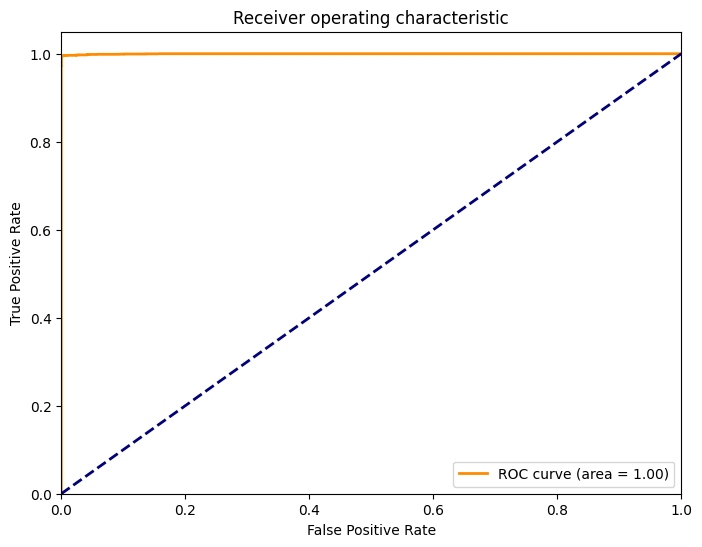

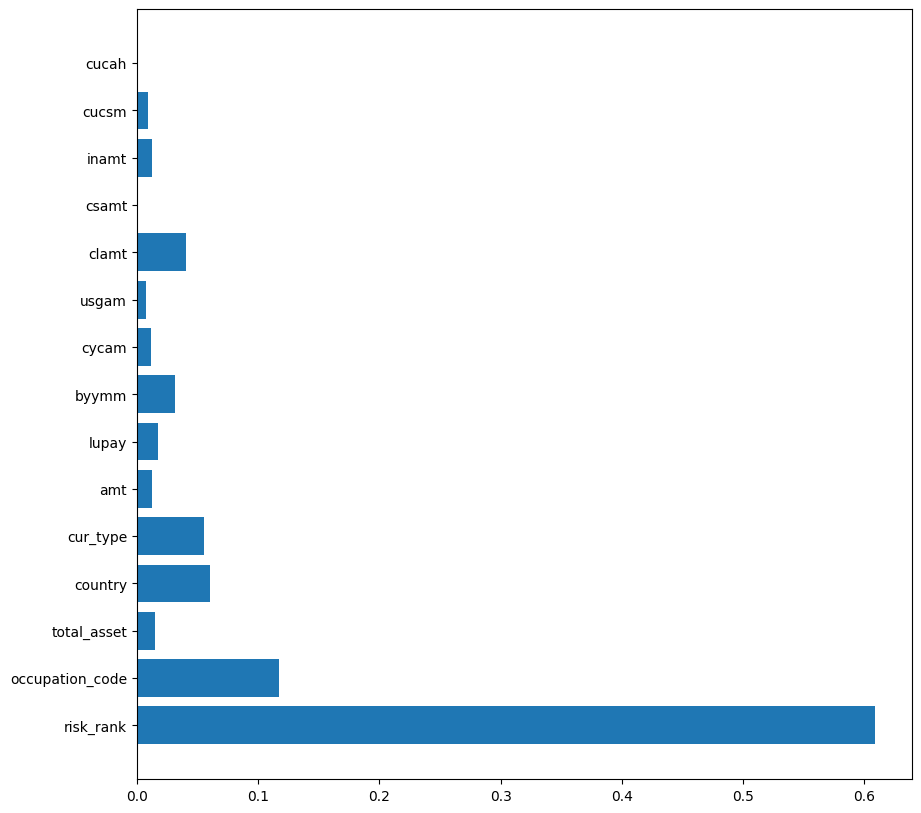

In [80]:
#Create XGBoost Classifier with best parameters
xgbBest = XGBClassifier(**study.best_params)
xgbBest.fit(X_train, Y_train)
xgbBest_pred = xgbBest.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, xgbBest_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, xgbBest_pred))
plot_roc_curve(Y_test, xgbBest.predict_proba(X_test)[::,1])

#Plot feature importance
plt.figure(figsize=(10, 10))
plt.barh(X.columns, xgbBest.feature_importances_)
plt.show()




In [91]:
#Check amount of fraud in the model calculated by the model
fraud = xgbBest.predict_proba(test)
fraud = pd.DataFrame(fraud)
fraud = fraud[1]
fraud = fraud[fraud > 0.5]
len(fraud)





7

In [81]:
#Predict fraud probability for test data
xgbBest_pred_test_prob = xgbBest.predict_proba(test)
xgbBest_pred_test_prob = pd.DataFrame(xgbBest_pred_test_prob)
xgbBest_pred_test_prob.head()


,0,1
0,0.999929,0.000071
1,0.999788,0.000212
2,0.999970,0.000030
3,0.999988,0.000012
4,0.999892,0.000108


In [82]:
#Length of xgbBest_pred_test_prob
len(xgbBest_pred_test_prob)

1845

In [88]:
testAlertXGB2 = testAlert
testAlertXGB2['probability'] = xgbBest_pred_test_prob[1]
testAlertXGB2.head()

,alert_key,probability
0,352249,0.000071
1,352253,0.000212
2,352254,0.000030
3,352280,0.000012
4,352282,0.000108


In [94]:
#Combine my_submission_xgbBest and sample and replace the probability column with my_submission_xgbBest probability column
my_submission_xgbBest_combine = pd.merge(sample, testAlertXGB2, on='alert_key', how='left')
my_submission_xgbBest_combine.head()

,alert_key,probability_x,probability_y
0,357307,0.000017,0.000195
1,376329,0.000324,NaN
2,373644,0.000372,NaN
3,357668,0.000489,0.000009
4,354443,0.000526,0.000450


In [96]:
#Replace NaN values with with probailty_x column
my_submission_xgbBest_combine['probability_y'] = my_submission_xgbBest_combine['probability_y'].fillna(my_submission_xgbBest_combine['probability_x'])

#Drop probability_x column
my_submission_xgbBest_combine = my_submission_xgbBest_combine.drop(['probability_x'], axis=1)

#rename probability_y column to probability
my_submission_xgbBest_combine = my_submission_xgbBest_combine.rename(columns={'probability_y': 'probability'})




In [98]:
#Head of my_submission_xgbBest_combine
my_submission_xgbBest_combine.head()

,alert_key,probability
0,357307,0.000195
1,376329,0.000324
2,373644,0.000372
3,357668,0.000009
4,354443,0.000450


In [99]:
#Convert the dataframe to csv
my_submission_xgbBest_combine.to_csv('submission_xgbBestNewDataset.csv', index=False)
